In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("GDP.csv")
df

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


## Informações do Dataset
- o comando *.info()* é responsável por trazer uma série de informações do DataFrame

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB
None


## Análise básica do Dataset
- O comando *describe()* no pandas gera um resumo estatístico do DataFrame, mas ele fornece apenas estatísticas descritivas padrão, como a *contagem (count)*, *média (mean)*

In [45]:
print(df.describe(include="all"))

            Country  Region                           Year        GDP_pp 
count          4419    4419                           4419    4419.000000
unique          193       8                            NaN            NaN
top     Afghanistan  Europe                            NaN            NaN
freq             23    1063                            NaN            NaN
mean            NaN     NaN  1956-01-11 07:26:06.598778048    5551.033745
min             NaN     NaN            1901-01-01 00:00:00     285.150000
25%             NaN     NaN            1926-01-01 00:00:00    1004.510000
50%             NaN     NaN            1956-01-01 00:00:00    2201.460000
75%             NaN     NaN            1986-01-01 00:00:00    5699.825000
max             NaN     NaN            2011-01-01 00:00:00  118681.300000
std             NaN     NaN                            NaN    9300.076227


## Resetando Index
 - O método *reset_index()* é usado para redefinir o índice de um DataFrame.

In [5]:
df.reset_index()

,index,Country,Region,Year,GDP_pp
0,0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...,...
4414,4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


## Passando a coluna Year para o tipo Date
- O *pd.to_datetime* é usado para passar para o tipo Data, nesse caso passamos a coluna Year do tipo object para o tipo Date

In [6]:
df["Year"] = pd.to_datetime(df["Year"])

In [7]:
df['Year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4419 entries, 0 to 4418
Series name: Year
Non-Null Count  Dtype         
--------------  -----         
4419 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.7 KB


## Aplicando mudança de tipo na coluna GDP_pp(Índice de obesidade anual).
- Aplicamos uma mudança de tipos para a coluna *GDP_pp* visto que a mesma possui a principio o tipo *object* oque impede a execução de calculos, nesse caso aplicamos além da mudança de tipos um *strip()* que remove os espaços do inicio e do fim do dado, e um *replace()* que é responsável pela troca de *","* para *""(Espaços vazios)* visto que não é possível aplicar uma mudança de tipo para float quando o número possui *","*. 

In [8]:
df[" GDP_pp "] = df[" GDP_pp "].apply(lambda x : float(x.strip().replace(",","")))

In [9]:
df[" GDP_pp "].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4419 entries, 0 to 4418
Series name:  GDP_pp 
Non-Null Count  Dtype  
--------------  -----  
4419 non-null   float64
dtypes: float64(1)
memory usage: 34.7 KB


## Relação países com as maiores médias de Obesidade (1901-2011) 

In [41]:
df_country_mean = df.groupby(["Country"])[" GDP_pp "].mean().round()
df_country_max_mean = df_country_mean.sort_values().tail()
media_max = []

def media_paises():
    for country in df_country_max_mean.index:
        media_max.append(df_country_max_mean[country])
media_paises()

#print(media)

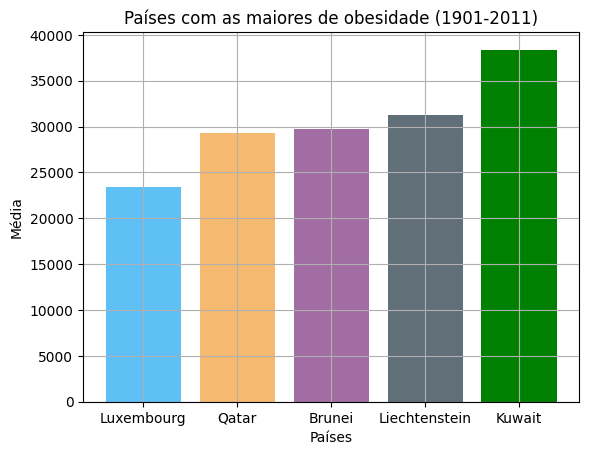

In [43]:
cores = ["#5FC0F5","#F5BA6F","#A26DA3","#606F78","green"]
plt.bar(df_country_max_mean.index, media_max, color=(cores))
plt.title("Países com as maiores médias de obesidade (1901-2011)")
plt.xlabel("Países")
plt.ylabel("Média")
plt.grid()
plt.show()

## Relação países com as menores médias de Obesidade (1901-2011).

In [27]:
df_country_mean = df.groupby(["Country"])[" GDP_pp "].mean().round()
df_country_min_mean = df_country_mean.sort_values().head()
media_min = []

def media_paises():
    for country in df_country_min_mean.index:
        media_min.append(df_country_min_mean[country])
media_paises()

print(media_min)

[np.float64(415.0), np.float64(460.0), np.float64(477.0), np.float64(488.0), np.float64(509.0)]


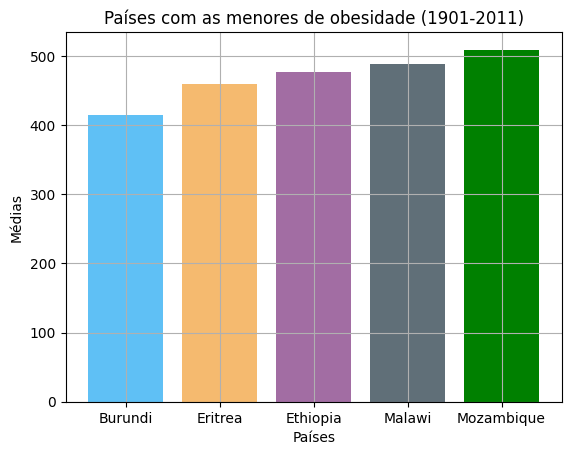

In [47]:
cores = ["#5FC0F5","#F5BA6F","#A26DA3","#606F78","green"]
plt.bar(df_country_min_mean.index, media_min, color=(cores))
plt.title("Países com as menores de obesidade (1901-2011)")
plt.xlabel("Países")
plt.ylabel("Médias")
plt.grid(True)
plt.show()

## Relação média de obesidade no Brazil (1901-2011).

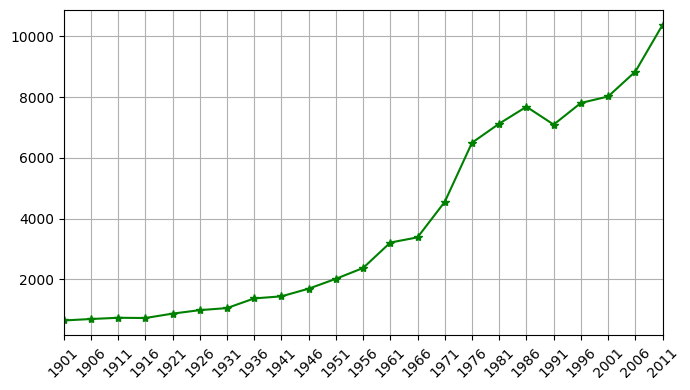

In [46]:
#Relação Brazil

df_brazil = df[df["Country"] == "Brazil"]
mean = df_brazil[" GDP_pp "].mean()
year = df_brazil["Year"].dt.year.unique()

plt.figure(figsize=(7, 4))
plt.plot(year, df_brazil[" GDP_pp "],"-*",color=("green"))
plt.xlim(min(year),max(year))
plt.grid(True)
plt.xticks(year, rotation=45)
plt.tight_layout()
plt.show()

## Média de Obesidade por Região

In [50]:
df_agrupado_region = df.groupby(["Region"])[" GDP_pp "].mean().round()
print("Média por Região:")
print(df_agrupado_region.sort_values())

Média por Região:
Region
Sub-Saharan Africa                                1551.0
Asia                                              3816.0
Central America and the Caribbean                 4271.0
South America                                     4348.0
Australia and Oceania                             4563.0
Middle East, North Africa, and Greater Arabia     7437.0
Europe                                           10039.0
North America                                    13934.0
Name:  GDP_pp , dtype: float64


## Relação maior média de Obesidade por Região.
- Relação da *North America* que corresponde a maior média de Obesidade por região.  

In [16]:
df_north_america = df[df["Region"] == "North America"]
df_north_america_mean = df_north_america.groupby(["Country"])[" GDP_pp "].mean().round()

media = []

def df_america():
    for i in df_north_america_mean.index:
        media.append(df_north_america_mean[i])
df_america()

print(media)

[np.float64(15885.0), np.float64(13805.0), np.float64(5467.0), np.float64(20580.0)]


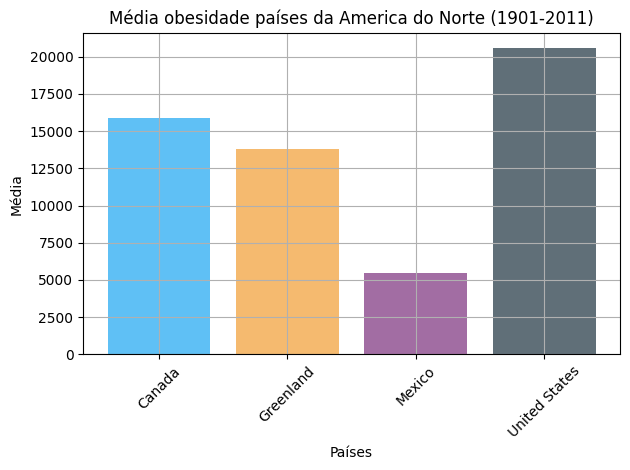

In [33]:
cores = ["#5FC0F5","#F5BA6F","#A26DA3","#606F78"]
plt.bar(df_north_america_mean.index, media,color=(cores))
plt.title("Média obesidade países da America do Norte (1901-2011)")
plt.xlabel("Países")
plt.ylabel("Média")                                                  
plt.xticks(df_north_america_mean.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()